In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# preprocessing
import re
import nltk
from nltk.corpus import stopwords
from string import punctuation
from textblob import TextBlob

# tokenization
from collections import Counter


pd.set_option('display.max_columns', 500)
title_fontsize = 15

In [155]:
tweets = pd.read_csv('./data/pre-preprocess/all_stock_score.csv', parse_dates=['Date']).iloc[:, 1:]
stocks = pd.read_csv('./data/scraped_stock_2015_2022.csv')

tweets.head()

,Date,Content,ticker,score,label
0,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL,0.0000,neutral
1,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,AAPL,-0.8271,negative
2,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AMZN,-0.4278,neutral
3,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,TSLA,0.0000,neutral
4,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,0.0000,neutral


In [31]:
tweets = tweets.dropna()

In [32]:
tweets['Date'] = pd.to_datetime(tweets['Date'])

In [33]:
# removing the tz localize from all the datetime
tweets['Date'] = tweets['Date'].apply(lambda x: pd.to_datetime(f'{x.date()} {x.time()}'))

In [34]:
tweets.to_csv('./data/all_stock_score.csv')

# tweets2.read_csv('./data/all_stock_score.csv')

In [73]:
tweets2.to_csv('./data/tweets_unstemmed_scores_cleaned.csv')
tweets.to_csv('./data/tweets_scores_cleaned.csv')

### Cleaning up the Tweets

In [159]:
def remove_substring(string, pattern, replacement):
    
    substrings_to_remove = re.findall(pattern, string)
    for substring in substrings_to_remove:
        string = string.replace(substring, replacement)
        
    return string

def reduce_words_to_stem(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words.split()]

In [160]:
# making everything lowercase
tweets['Content'] = tweets['Content'].apply(lambda x: x.lower())

In [161]:
# removing websites, and usernames and changing it to a base

website_pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)'
username_pattern = '@(\w{1,15})'

tweets['Content'] = tweets['Content'].apply(lambda x: remove_substring(x, website_pattern, ''))
tweets['Content'] = tweets['Content'].apply(lambda x: remove_substring(x, username_pattern, ''))

In [162]:
# removing stop words

nltk.download('stopwords')
stopwords = stopwords.words('english')
tweets['Content'] = tweets['Content'].apply(lambda x: ' '.join(x.lower() for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/setone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [172]:
# removing all punctuation

print(punctuation)
tweets['Content'] = tweets['Content'].apply(lambda x: ''.join([c for c in x if c not in punctuation]))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [186]:
# correct spellings

def spelling_check(text):
    global idx
    
    idx += 1
    
    if idx % 1e3 == 0: print(idx)
        
    try:
        result = str(TextBlob(text).correct())
    except:
        print(f'failed at {idx}')
        
    return result

idx = 0
tweets['Content'] = tweets['Content'].apply(lambda x: spelling_check(x))

In [222]:
# using lemmatization 

nltk.download('wordnet')
nltk.download('punkt')
# nltk.download('omw-1.4')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

idx = 0

def lemmatize_text(text):
    global idx
    
    idx += 1
    
    if idx % 5e4 == 0: print(f'row {idx} complete')
        
    try: 
        result = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    except:
        print(f'failed at {idx}')
        
    return result

tweets['Lemmatized_tokens'] = tweets['Content'].apply(lambda x: lemmatize_text(x))

In [187]:
# remove duplicates & reset index
tweets = tweets.drop_duplicates().reset_index().iloc[:, 1:]
tweets = tweets.drop([4436167, 4436162]).reset_index().iloc[:, 1:]

In [232]:
# tweets.to_csv(f'./data/tweets_cleaned_tokenized_words.csv')

In [6]:
tweets = pd.read_csv('./data/tweets_cleaned_tokenized_words.csv', index_col=['Unnamed: 0'])

In [8]:
tweets

,Date,Content,ticker,score,label,Lemmatized_tokens
0,2015-01-01 00:00:57,lx21 made 10008 aapl check out learn howtotrad...,AAPL,0.0000,neutral,"['lx21', 'made', '10008', 'aapl', 'check', 'ou..."
1,2015-01-01 00:01:36,insanity today weirdo massive selling aapl bid...,AAPL,-0.8271,negative,"['insanity', 'today', 'weirdo', 'massive', 'se..."
2,2015-01-01 00:01:50,sp100 stocks performance hd low sbux tgt dvn i...,AMZN,-0.4278,neutral,"['sp100', 'stock', 'performance', 'hd', 'low',..."
3,2015-01-01 00:06:47,gm tsla volkswagen pushes 2014 record recall t...,TSLA,0.0000,neutral,"['gm', 'tsla', 'volkswagen', 'push', '2014', '..."
4,2015-01-01 00:10:05,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"['swing', 'trading', '891', 'return', '14', 'd..."
...,...,...,...,...,...,...
4099616,2015-01-17 00:05:30,rdpro9 pnppro9 zs guipos per conducted dialogu...,ZS,0.0000,neutral,"['rdpro9', 'pnppro9', 'z', 'guipos', 'per', 'c..."
4099617,2015-01-09 14:03:50,zspnppro9 zsppopcr zsppo conducted visitation ...,ZS,0.0000,neutral,"['zspnppro9', 'zsppopcr', 'zsppo', 'conducted'..."
4099618,2015-01-09 04:15:07,al zs zeynepsu,ZS,0.0000,neutral,"['al', 'z', 'zeynepsu']"
4099619,2015-01-06 12:24:25,opportunities front end developers zs zs assoc...,ZS,0.4389,positive,"['opportunity', 'front', 'end', 'developer', '..."


### Numeric Tokenization

In [10]:
# create a list of all tweets in column
all_tweets = tweets['Content'].tolist()

# join the tweets togaether to make one big blob
text = ' '.join(all_tweets)

# finding the most frequent words
words = text.split()
word_counts = Counter(words)

# sort the words so the most frequent are on top
total_words = len(words)
sorted_words = word_counts.most_common(total_words)

In [11]:
# create an int-mapping dictionary so most common words will have lower indexes
vocab_to_int = {w:i+1 for i, (w, c) in enumerate(sorted_words)}

In [12]:
tweets

,Date,Content,ticker,score,label,Lemmatized_tokens
0,2015-01-01 00:00:57,lx21 made 10008 aapl check out learn howtotrad...,AAPL,0.0000,neutral,"['lx21', 'made', '10008', 'aapl', 'check', 'ou..."
1,2015-01-01 00:01:36,insanity today weirdo massive selling aapl bid...,AAPL,-0.8271,negative,"['insanity', 'today', 'weirdo', 'massive', 'se..."
2,2015-01-01 00:01:50,sp100 stocks performance hd low sbux tgt dvn i...,AMZN,-0.4278,neutral,"['sp100', 'stock', 'performance', 'hd', 'low',..."
3,2015-01-01 00:06:47,gm tsla volkswagen pushes 2014 record recall t...,TSLA,0.0000,neutral,"['gm', 'tsla', 'volkswagen', 'push', '2014', '..."
4,2015-01-01 00:10:05,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"['swing', 'trading', '891', 'return', '14', 'd..."
...,...,...,...,...,...,...
4099616,2015-01-17 00:05:30,rdpro9 pnppro9 zs guipos per conducted dialogu...,ZS,0.0000,neutral,"['rdpro9', 'pnppro9', 'z', 'guipos', 'per', 'c..."
4099617,2015-01-09 14:03:50,zspnppro9 zsppopcr zsppo conducted visitation ...,ZS,0.0000,neutral,"['zspnppro9', 'zsppopcr', 'zsppo', 'conducted'..."
4099618,2015-01-09 04:15:07,al zs zeynepsu,ZS,0.0000,neutral,"['al', 'z', 'zeynepsu']"
4099619,2015-01-06 12:24:25,opportunities front end developers zs zs assoc...,ZS,0.4389,positive,"['opportunity', 'front', 'end', 'developer', '..."


In [235]:
len(all_tweets)

4440029

In [21]:
# tokenize the words so they are defined by integers rather than strings
tweets_int = []
for word in all_tweets:
    r = [vocab_to_int[w] for w in word.split()]
    tweets_int.append(r)
print(tweets_int[0:3])

[[18067, 258, 74678, 1, 143, 358, 448, 16155, 40264, 4372, 24451, 60063, 31077], [6800, 33, 41776, 709, 242, 1, 727, 1585, 2448, 537, 3198, 347, 242, 24, 537], [2141, 14, 384, 341, 209, 332, 485, 5026, 101, 3, 40, 5210, 174, 878, 1759, 84, 444, 1616, 297, 11]]


In [22]:
# tokenizing the labels so that we can define them as positive, neutral, or negative

encoded_labels = [1 if label =='positive' else 0 if label == 'neutral' else -1 for label in tweets['label']]
encoded_labels = np.array(encoded_labels)

tweets['label'] = encoded_labels

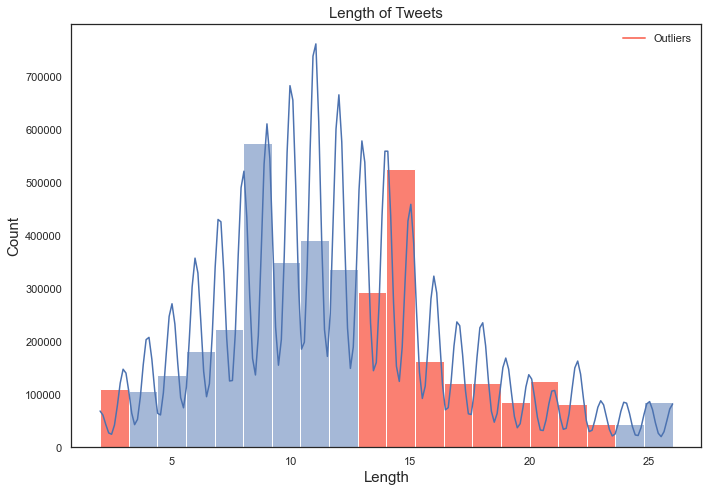

count    4.099621e+06
mean     1.202143e+01
std      5.090263e+00
min      2.000000e+00
25%      9.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      2.600000e+01
dtype: float64

In [47]:
sns.set(rc = {'figure.figsize':(10, 7)})
sns.set_style('white')

tweets_len = [len(x) for x in tweets_int]

fig = sns.histplot(pd.Series(tweets_len), bins=20, kde=True)
# fig.set(xlim=(0, 65), yticks=[0, 2.5e3, 5e3, 7.5e3], 
#         yticklabels=[0, '2.5K', '5K', '7.5K'])



plt.xlabel('Length', fontsize=title_fontsize)
plt.ylabel('Count', fontsize=title_fontsize)
plt.title('Length of Tweets', fontsize = title_fontsize)

# coloring outliers red
fig.patches[0].set_facecolor('salmon')
fig.patches[9].set_facecolor('salmon')
fig.patches[10].set_facecolor('salmon')
fig.patches[11].set_facecolor('salmon')
fig.patches[12].set_facecolor('salmon')
fig.patches[13].set_facecolor('salmon')
fig.patches[14].set_facecolor('salmon')
fig.patches[15].set_facecolor('salmon')
fig.patches[16].set_facecolor('salmon')
fig.patches[17].set_facecolor('salmon')

# creating legend for outliers
outliers = [Line2D([0], [0], color='salmon', lw=2)]
plt.legend(outliers, ['Outliers'], frameon=False)

plt.tight_layout()
plt.savefig('./visualization/Preprocessing: Tweet_Lengths.png', dpi = 600)
plt.show()

pd.Series(tweets_len).describe()

In [254]:
# removing all outliers, defined in red above
# with 1.5IQR rule: removing tweets < 1 and > 26.5

tweets_df = pd.DataFrame(tweets_len)


df = tweets_df[(tweets_df[0] > 1) & (tweets_df[0] < 26.5)]
tweets = tweets.loc[df.index]
len(tweets)

4099621

In [26]:
def pad_features(tweets_int, seq_length):
    ''' Return features of tweets_ints, where each tweet is 
    padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(tweets_int), seq_length), dtype = int)
    
    for i, twt in enumerate(tweets_int):
        tweets_len = len(twt)
        
        if tweets_len <= seq_length:
            zeroes = list(np.zeros(seq_length-tweets_len))
            new = zeroes+twt
        elif tweets_len > seq_length:
            new = twt[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [219]:
tweets.to_csv('./data/stock_tweets_cleaned.csv', index=False)

In [262]:
# tweets = tweets.reset_index().iloc[:, 1:]
# tweets.to_csv('./data/tweets_cleaned_tokenized_words.csv')
# tweets

In [263]:
tweets

,Date,Content,ticker,score,label,Lemmatized_tokens
0,2015-01-01 00:00:57,lx21 made 10008 aapl check out learn howtotrad...,AAPL,0.0000,neutral,"[lx21, made, 10008, aapl, check, out, learn, h..."
1,2015-01-01 00:01:36,insanity today weirdo massive selling aapl bid...,AAPL,-0.8271,negative,"[insanity, today, weirdo, massive, selling, aa..."
2,2015-01-01 00:01:50,sp100 stocks performance hd low sbux tgt dvn i...,AMZN,-0.4278,neutral,"[sp100, stock, performance, hd, low, sbux, tgt..."
3,2015-01-01 00:06:47,gm tsla volkswagen pushes 2014 record recall t...,TSLA,0.0000,neutral,"[gm, tsla, volkswagen, push, 2014, record, rec..."
4,2015-01-01 00:10:05,swing trading 891 return 14 days swingtrading ...,AAPL,0.0000,neutral,"[swing, trading, 891, return, 14, day, swingtr..."
...,...,...,...,...,...,...
4099616,2015-01-17 00:05:30,rdpro9 pnppro9 zs guipos per conducted dialogu...,ZS,0.0000,neutral,"[rdpro9, pnppro9, z, guipos, per, conducted, d..."
4099617,2015-01-09 14:03:50,zspnppro9 zsppopcr zsppo conducted visitation ...,ZS,0.0000,neutral,"[zspnppro9, zsppopcr, zsppo, conducted, visita..."
4099618,2015-01-09 04:15:07,al zs zeynepsu,ZS,0.0000,neutral,"[al, z, zeynepsu]"
4099619,2015-01-06 12:24:25,opportunities front end developers zs zs assoc...,ZS,0.4389,positive,"[opportunity, front, end, developer, z, z, ass..."


In [267]:
tweets[['Content']].to_csv('./data/raw_content.csv')
tweets = tweets.drop(['Content'], axis=1)

In [275]:
tweets

,Date,ticker,score,label,Lemmatized_tokens
0,2015-01-01 00:00:57,AAPL,0.0000,neutral,"[lx21, made, 10008, aapl, check, out, learn, h..."
1,2015-01-01 00:01:36,AAPL,-0.8271,negative,"[insanity, today, weirdo, massive, selling, aa..."
2,2015-01-01 00:01:50,AMZN,-0.4278,neutral,"[sp100, stock, performance, hd, low, sbux, tgt..."
3,2015-01-01 00:06:47,TSLA,0.0000,neutral,"[gm, tsla, volkswagen, push, 2014, record, rec..."
4,2015-01-01 00:10:05,AAPL,0.0000,neutral,"[swing, trading, 891, return, 14, day, swingtr..."
...,...,...,...,...,...
4099616,2015-01-17 00:05:30,ZS,0.0000,neutral,"[rdpro9, pnppro9, z, guipos, per, conducted, d..."
4099617,2015-01-09 14:03:50,ZS,0.0000,neutral,"[zspnppro9, zsppopcr, zsppo, conducted, visita..."
4099618,2015-01-09 04:15:07,ZS,0.0000,neutral,"[al, z, zeynepsu]"
4099619,2015-01-06 12:24:25,ZS,0.4389,positive,"[opportunity, front, end, developer, z, z, ass..."


In [39]:
df_test = tweets[tweets['Lemmatized_tokens'].str.contains('today')]

In [41]:
df_test.index

Int64Index([      1,      35,      76,      95,     251,     324,     508,
                620,     636,     776,
            ...
            4099110, 4099122, 4099215, 4099284, 4099311, 4099358, 4099395,
            4099400, 4099549, 4099608],
           dtype='int64', length=151278)

In [34]:
pd.DataFrame()

In [44]:
tweets['Lemmatized_tokens'][35]

"['penny', 'stock', 'nyse', 'nasdaq', 'trade', 'stock', 'market', 'today', '296', 'last', 'week', 'kgc', 'erbb', 'f', 'msft']"

In [46]:
X = pd.DataFrame(pad_features(tweets_int, max(tweets_len)))
Y = pd.DataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0,0,0,0,0,0,0,0,0,0,0,0,0,18067,258,74678,1,143,358,448,16155,40264,4372,24451,60063,31077
1,0,0,0,0,0,0,0,0,0,0,0,6800,33,41776,709,242,1,727,1585,2448,537,3198,347,242,24,537
2,0,0,0,0,0,0,2141,14,384,341,209,332,485,5026,101,3,40,5210,174,878,1759,84,444,1616,297,11
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,2,4481,3287,2071,508,2623,23580,196,52861,5,398967
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,321,24,42604,770,813,215,2326,1211,17661,29750,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,398880,155217,2150,256375,414,18483,17450,267,1067889,1067890
4099617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1067891,1067892,1067893,18483,178993,36243,16025,1067894,1067895
4099618,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2853,2150,1067896
4099619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1842,1879,272,1388,2150,2150,1067897,8148,21900,1244,139556,1067898


In [35]:
padding

array([[      0,       0,       0, ...,   24451,   60063,   31077],
       [      0,       0,       0, ...,     242,      24,     537],
       [      0,       0,       0, ...,    1616,     297,      11],
       ...,
       [      0,       0,       0, ...,    2853,    2150, 1067896],
       [      0,       0,       0, ...,    1244,  139556, 1067898],
       [      0,       0,       0, ...,    1104,     503,    4914]])

In [31]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()

In [28]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))


# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)